<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [2]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

In [3]:
# Task 1-1: use linear regression in sklearn
model = linear_model.LinearRegression().fit(train_data, train_target)


# Task 1-2: show intercept and coefficents
print('W0 : {:2.5}'.format(model.intercept_[0]))
coefs = model.coef_[0]
for i in range(len(coefs)):
    print('W{:<2}: {:.5f}'.format(i + 1, coefs[i]))

# Task 1-3: show errors on training dataset and testing dataset
train_predict = model.predict(train_data)
test_predict = model.predict(test_data)
train_error = mean_squared_error(train_target, train_predict) / 2
test_error = mean_squared_error(test_target, test_predict) / 2

print('Training Set MSE: {:.5f}'.format(train_error))
print('Test Set MSE: {:.5f}'.format(test_error))


W0 : 30.247
W1 : -0.11306
W2 : 0.03011
W3 : 0.04038
W4 : 2.78444
W5 : -17.20263
W6 : 4.43884
W7 : -0.00630
W8 : -1.44787
W9 : 0.26243
W10: -0.01065
W11: -0.91546
W12: 0.01235
W13: -0.50857
Training Set MSE: 10.82071
Test Set MSE: 12.14556


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [4]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    return np.matmul(np.matmul(linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)  
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(X, w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
for i in range(len(w)):
    print("W{:<2}: {:.5f}".format(i, w[i][0]))

# Task 2-4: show errors on training dataset and testing dataset
train_predict = myPredictFun(train_data_intercept, w)
test_predict = myPredictFun(test_data_intercept, w)
train_error = mean_squared_error(train_predict, train_target) / 2
test_error = mean_squared_error(test_predict, test_target) / 2

print('Training Set MSE: {:.5f}'.format(train_error))
print('Test Set MSE: {:.5f}'.format(test_error))

W0 : 30.24675
W1 : -0.11306
W2 : 0.03011
W3 : 0.04038
W4 : 2.78444
W5 : -17.20263
W6 : 4.43884
W7 : -0.00630
W8 : -1.44787
W9 : 0.26243
W10: -0.01065
W11: -0.91546
W12: 0.01235
W13: -0.50857
Training Set MSE: 10.82071
Test Set MSE: 12.14556


<h4>Use numerical solution (baisc gradient descent) to perform linear regression in the following cell</h4>

W0 : 22.78908
W1 : -0.95769
W2 : 0.59324
W3 : 0.11306
W4 : 0.74669
W5 : -1.91718
W6 : 3.18036
W7 : -0.20479
W8 : -3.01764
W9 : 1.84088
W10: -1.31544
W11: -2.00682
W12: 1.12967
W13: -3.56403
Training Set MSE: 10.83679
Test Set MSE: 12.26761


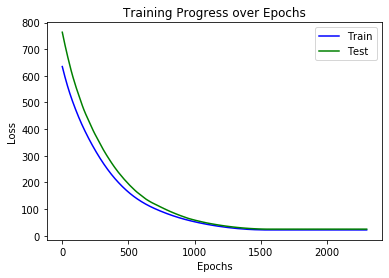

In [20]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
#
# **Added test data arguments to track test loss over epochs**
def myGradientDescentFun(X_train,X_test,y_train,y_test,learning_rate,numItrs):
    
    # create random weights
    w = 20 * np.random.rand(X_train.shape[1], 1) - 10
    
    # stores the training loss at first index and 
    # the testing loss at second index
    loss = [list(), list()]
    
    for _ in range(numItrs):
        # loss and gradient share this calculation
        # calculating here saves operations
        u = y_train - np.matmul(X_train, w)
        v = y_test - np.matmul(X_test, w)
        
        # store loss from training data
        loss[0].append(np.matmul(np.transpose(u), u)[0][0] / len(X_train))
        
        # store loss from testing data
        loss[1].append(np.matmul(np.transpose(v), v)[0][0] / len(X_test))
        
        # take a step opposite the gradient value
        w = w + learning_rate * np.sign(np.matmul(np.transpose(X_train), u))
        
    return w, loss

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(X, w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss = myGradientDescentFun(train_data_intercept,test_data_intercept,train_target,test_target,0.01,1600
                              )

# Task 3-3: show intercept and coefficents
for i in range(len(w)):
    print("W{:<2}: {:.5f}".format(i, w[i][0]))

# Task 3-4: show errors on training dataset and testing dataset
train_predict = myPredictFun(train_data_intercept, w)
test_predict = myPredictFun(test_data_intercept, w)
train_error = mean_squared_error(train_predict, train_target) / 2
test_error = mean_squared_error(test_predict, test_target) / 2

print('Training Set MSE: {:.5f}'.format(train_error))
print('Test Set MSE: {:.5f}'.format(test_error))


# Task 3-5: plot learning curves showing training errors and testing errors along iterations
plt.plot(range(len(loss[0])), loss[0], color='blue')  # training loss
plt.plot(range(len(loss[1])), loss[1], color='green') # testing loss
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training Progress over Epochs')
plt.gca().legend(('Train', 'Test'))
plt.show()

<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

W0 : 22.80495
W1 : -0.34201
W2 : 0.48646
W3 : -1.00957
W4 : 0.25168
W5 : -2.38335
W6 : 2.56506
W7 : 0.42704
W8 : -3.71597
W9 : -1.08593
W10: 1.40472
W11: -2.09735
W12: 1.31849
W13: -4.07036
Training Set MSE: 12.21855
Test Set MSE: 13.65981


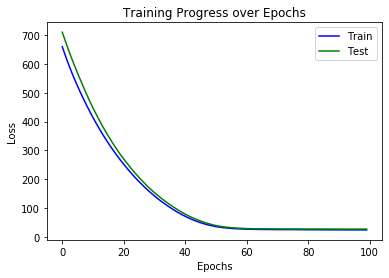

In [19]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X_train,X_test,y_train,y_test,learning_rate,epoches,batchsize):
    
    # create random weights
    w = 20 * np.random.rand(X_train.shape[1], 1) - 10
    
    # stores the training loss at first index and 
    # the testing loss at second index
    loss = [list(), list()]
    
    for _ in range(epoches):
            
        # loss and loss gradient share this calculation
        # calculating here saves operations
        u = y_train - np.matmul(X_train, w)
        v = y_test - np.matmul(X_test, w)
        
        # store loss from training data
        loss[0].append(np.matmul(np.transpose(u), u)[0][0] / len(X_train))
        
        # store loss from testing data
        loss[1].append(np.matmul(np.transpose(v), v)[0][0] / len(X_test))
        
        # train in batches
        for b in range(0,len(X_train),batchsize):
            
            # take a step opposite the gradient value
            w = w + learning_rate * np.sign(np.matmul(np.transpose(X_train[b:b + batchsize]), u[b:b + batchsize]))
        
    return w, loss

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(X, w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations    
w, loss = myGradientDescentFun(train_data_intercept,test_data_intercept,train_target,test_target,0.01,100,10)
    
# Task 4-3: show intercept and coefficents
for i in range(len(w)):
   print("W{:<2}: {:.5f}".format(i, w[i][0]))

# # Task 4-4: show errors on training dataset and testing dataset
train_predict = myPredictFun(train_data_intercept, w)
test_predict = myPredictFun(test_data_intercept, w)
train_error = mean_squared_error(train_predict, train_target) / 2
test_error = mean_squared_error(test_predict, test_target) / 2

print('Training Set MSE: {:.5f}'.format(train_error))
print('Test Set MSE: {:.5f}'.format(test_error))

# Task 4-5: plot learning curves showing training errors and testing errors along both
plt.plot(range(len(loss[0])), loss[0], color='blue')  # training loss
plt.plot(range(len(loss[1])), loss[1], color='green') # testing loss
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training Progress over Epochs')
plt.gca().legend(('Train', 'Test'))
plt.show()